<img src="https://devra.ai/analyst/notebook/2860/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Larsen & Toubro Realty Housing Analysis Notebook</b></div><div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

# Introduction

This notebook dives into the Larsen & Toubro Realty Housing dataset. It is curious to note that the combination of property specifics alongside location factors might provide us with interesting insights into property pricing trends. If you find the analysis useful, please consider upvoting it.

## Table of Contents
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusions and Next Steps](#Conclusions-and-Next-Steps)

In [12]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Setting backend to Agg for non-interactive plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set a seaborn style for the plots
sns.set(style="whitegrid")

In [13]:
# Data Loading
print('Loading dataset...')
data_path = 'lt_reality.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')
print('Dataset loaded. Shape:', df.shape)

Loading dataset...
Dataset loaded. Shape: (1500, 15)


In [21]:
df.describe()

,property_id,size_sqft,num_bedrooms,num_bathrooms,floor_number,total_floors,age_years,distance_to_metro_km,view_score,date_listed,price
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596,5.960000e+02
mean,746.882550,2772.919463,3.067114,2.545302,15.293624,21.703020,14.476510,5.206393,2.996644,2022-01-20 02:49:07.651006720,4.632503e+07
min,1.000000,351.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.160000,1.000000,2020-01-01 00:00:00,2.384000e+06
25%,371.750000,1605.000000,2.000000,2.000000,8.000000,12.000000,7.000000,2.915000,2.000000,2021-01-05 18:00:00,2.599225e+07
50%,741.500000,2815.000000,3.000000,3.000000,15.000000,22.000000,14.000000,5.345000,3.000000,2022-01-10 12:00:00,4.321100e+07
75%,1130.250000,4043.250000,4.000000,4.000000,23.000000,31.000000,22.000000,7.632500,4.000000,2023-02-03 06:00:00,5.858250e+07
max,1500.000000,4992.000000,5.000000,4.000000,29.000000,39.000000,29.000000,10.000000,5.000000,2024-12-01 00:00:00,1.329820e+08
std,436.590483,1364.516235,1.417369,1.116550,8.391233,10.353941,8.604735,2.806279,1.399876,NaN,2.733207e+07


In [24]:
# Data Cleaning and Preprocessing
print('Performing preliminary data inspection...')
print(df.head())

# Convert date_listed column to datetime. This is important because the dataset stores date as string.
df['date_listed'] = pd.to_datetime(df['date_listed'], errors='coerce')
if df['date_listed'].isnull().sum() > 0:
    print('There were some errors converting dates. Rows with errors will be dropped.')
    df = df.dropna(subset=['date_listed'])

# Check for missing values in other columns
print('\nMissing values by column:')
print(df.isnull().sum())

# Display dataframe info
print('\nDataframe Info:')
print(df.info())

Performing preliminary data inspection...
   property_id   location property_type  size_sqft  num_bedrooms  \
0            1  Delhi NCR         Villa       2636             1   
1            2    Chennai     Apartment       3461             4   
2            3       Pune     Penthouse       1783             5   
3            4    Chennai         Villa        833             4   
4            5  Bangalore     Apartment       2139             3   

   num_bathrooms  floor_number  total_floors  age_years       furnishing  \
0              3            28            18         25  Fully Furnished   
1              4            17             7          7   Semi-Furnished   
2              2             6            25          4      Unfurnished   
3              1            15            16          1  Fully Furnished   
4              3             5             6         17  Fully Furnished   

                                         amenities  distance_to_metro_km  \
0               

# Exploratory Data Analysis

In this section we perform several visual analyses to gain insights into the housing data. We begin with correlation heatmaps using just the numeric columns and then explore distributions and relationships with various plots.

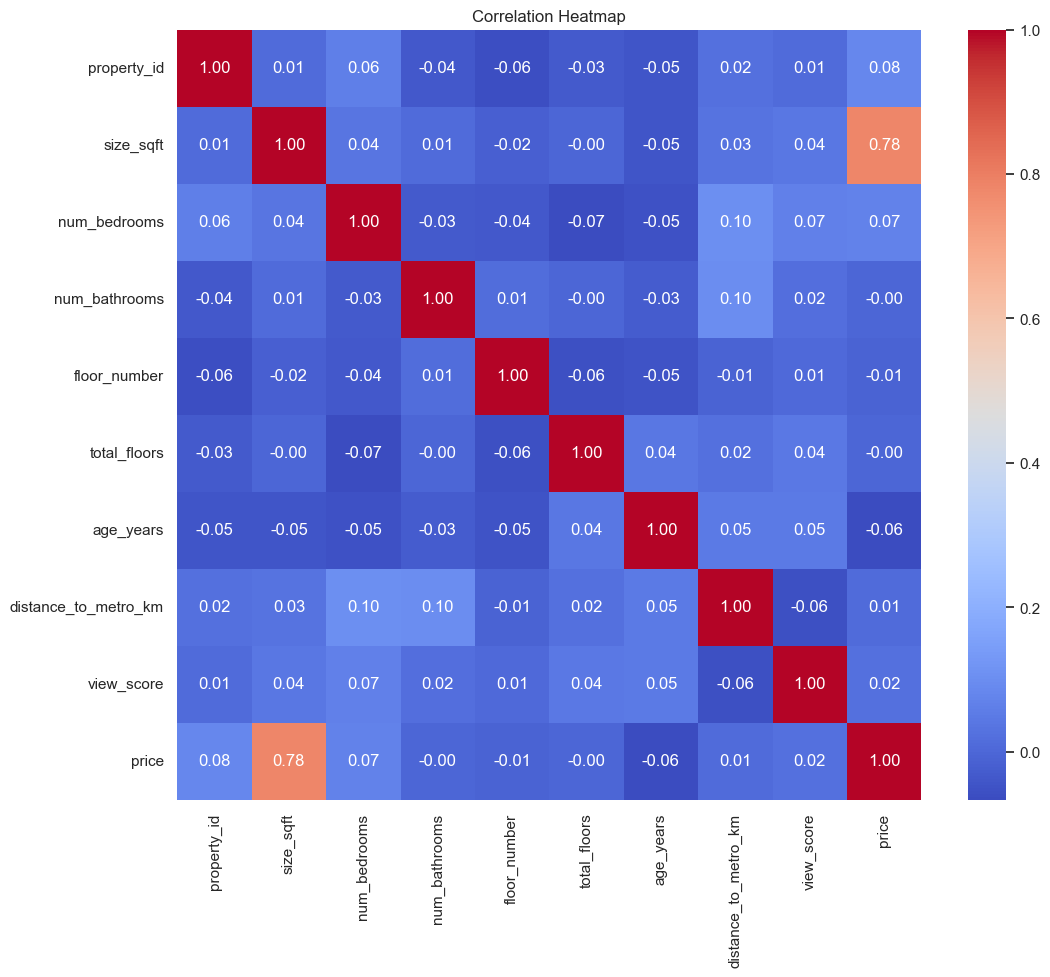

In [15]:
# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# We perform a correlation heatmap only if there are 4 or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print('Not enough numeric columns to perform a correlation heatmap.')

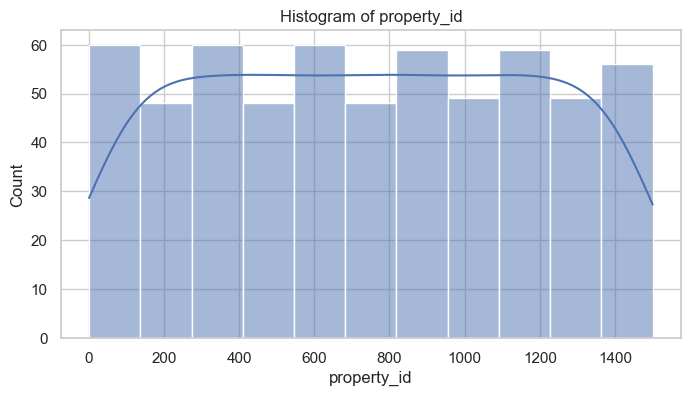

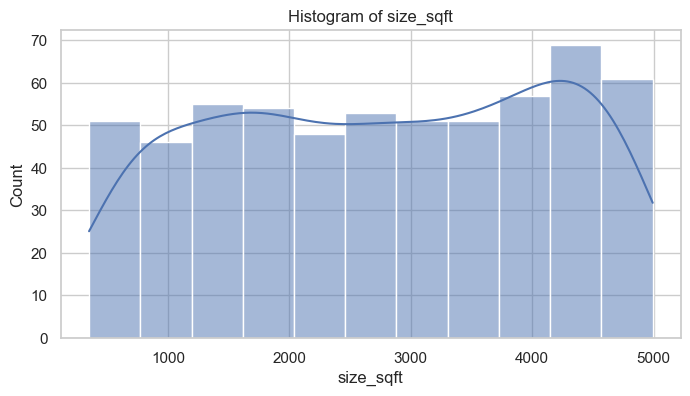

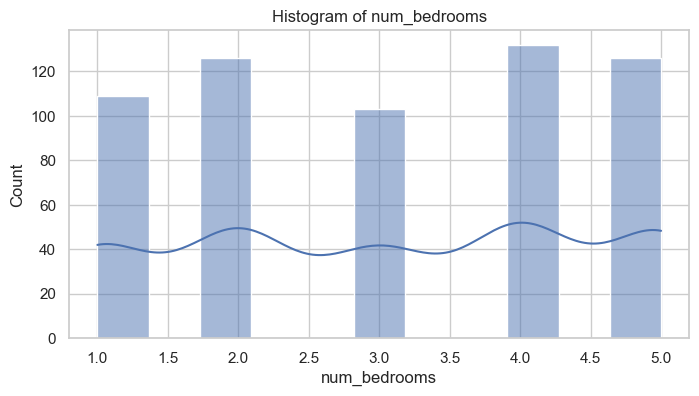

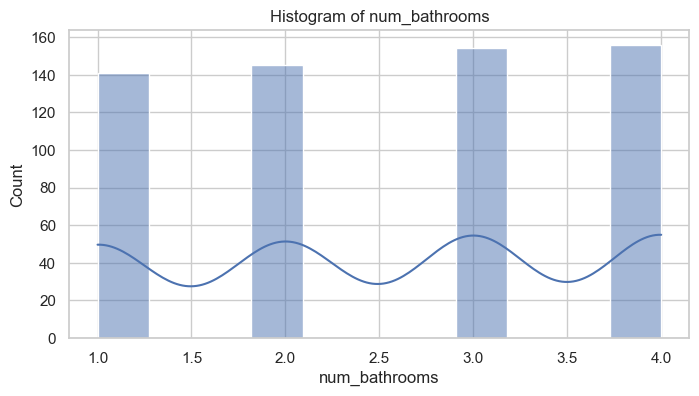

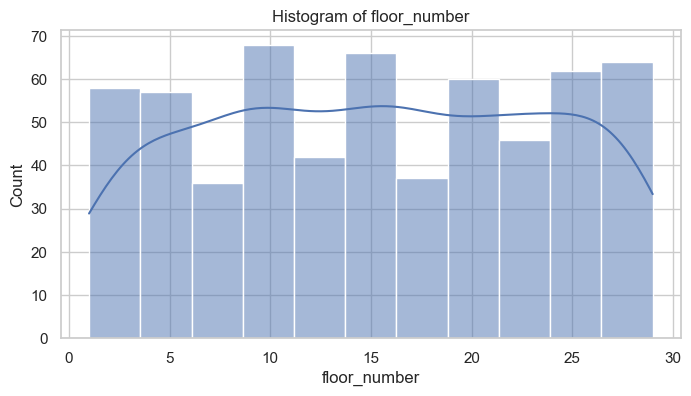

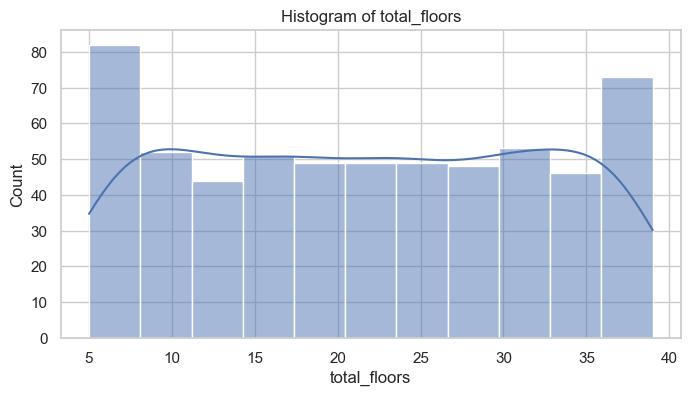

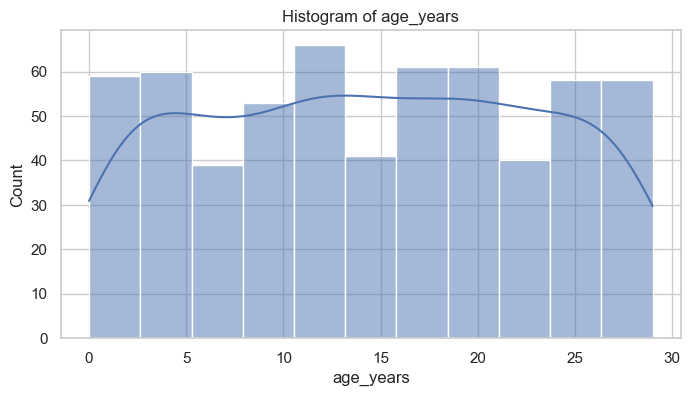

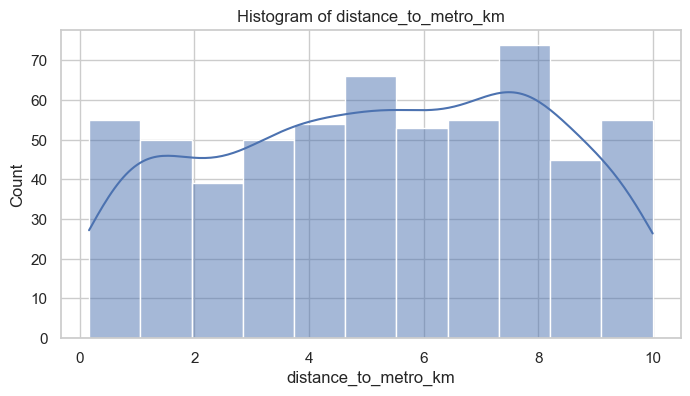

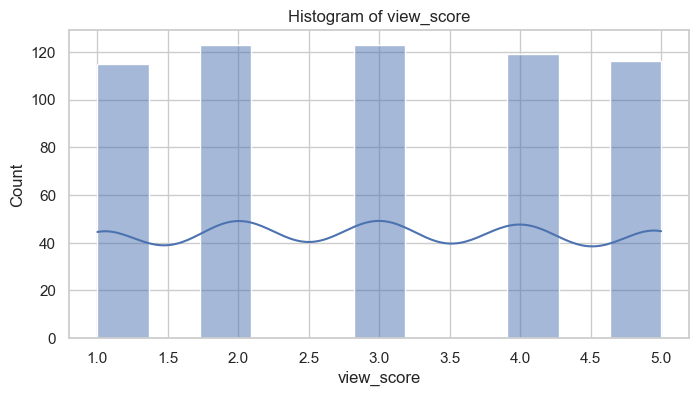

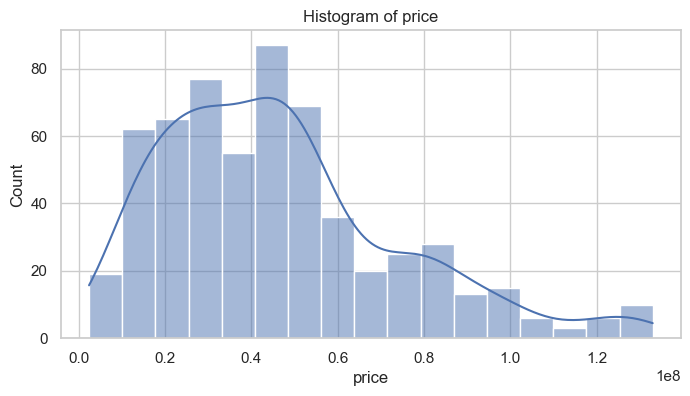

In [16]:
# Histograms for numeric feature distributions
numeric_cols = numeric_df.columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

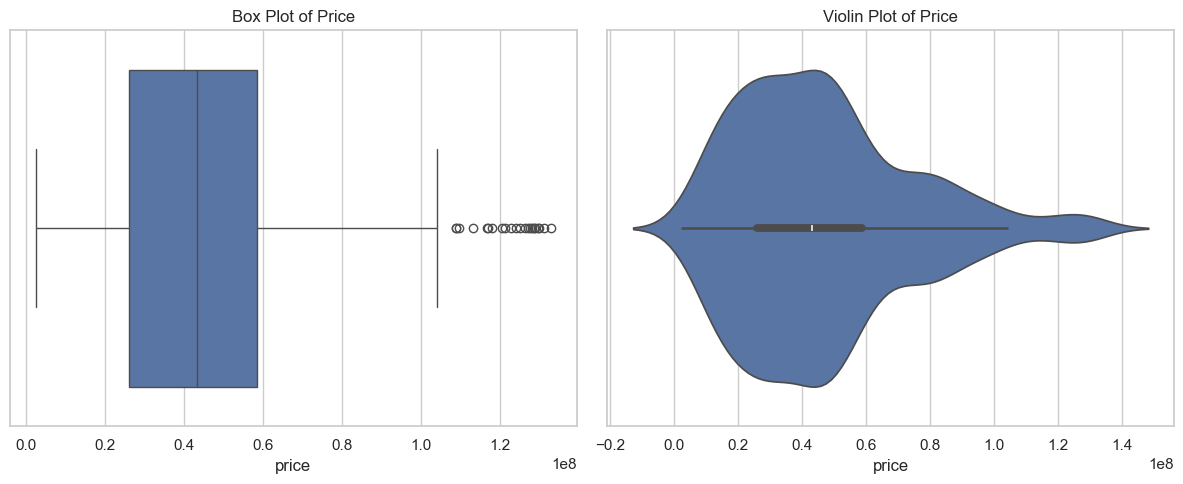

In [17]:
# Box Plot and Violin Plot for detecting outliers in 'price'
plt.figure(figsize=(12, 5))

# Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'])
plt.title('Box Plot of Price')

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x=df['price'])
plt.title('Violin Plot of Price')

plt.tight_layout()
plt.show()

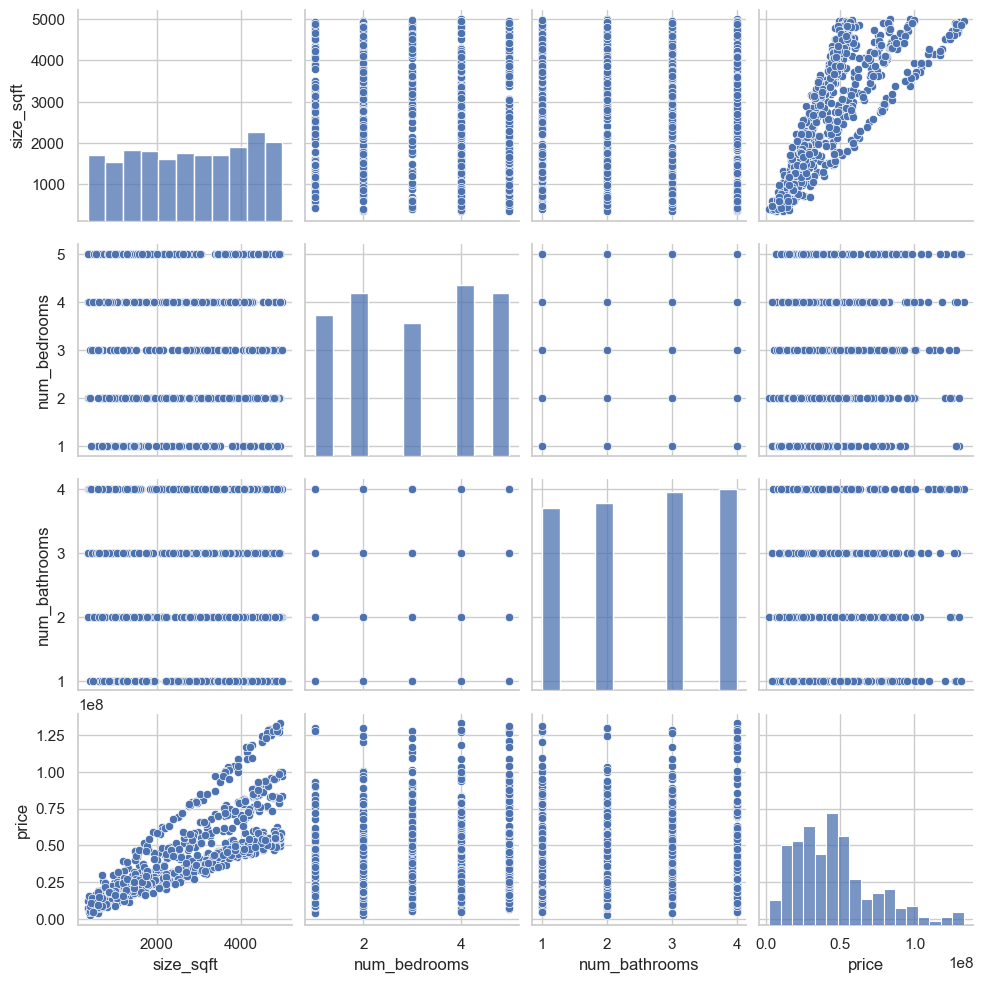

In [18]:
# Pair Plot for a subset of variables
cols_for_pairplot = ['size_sqft', 'num_bedrooms', 'num_bathrooms', 'price']
sns.pairplot(df[cols_for_pairplot])
plt.show()

# Predictive Modeling

For our prediction task we attempt to model the property price. We use a simple linear regression model that learns from numeric features such as size, number of bedrooms, number of bathrooms, etc. Note that categorical features may provide additional insights in a more advanced model.

In [19]:
# Prepare data for predictive modeling
# We select a subset of numeric features which are likely to impact the price
features = ['size_sqft', 'num_bedrooms', 'num_bathrooms', 'floor_number', 
            'total_floors', 'age_years', 'distance_to_metro_km', 'view_score']
target = 'price'

# Drop any rows with missing values in these columns
model_df = df[features + [target]].dropna()

# Split the data into training and testing sets
X = model_df[features]
y = model_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f'Linear Regression R^2 Score: {score:.4f}')

# Note: If you encounter errors such as dimension mismatch during model training, double-check the data types
# and ensure only numeric values are fed to the regression algorithm.

Linear Regression R^2 Score: 0.5601


# Conclusions and Next Steps

The analysis has provided us with several insights into the housing data. We began by cleaning and transforming the data, especially converting the date field appropriately. Throughout the exploratory analysis, various visualizations highlighted the relationships and distributions of data, which can guide further inquiry.

The linear regression predictor yielded an R^2 score that offers a starting point in predicting property prices. Future improvements might include:

- Incorporating categorical data through one-hot encoding or embedding techniques.
- Experimenting with more complex models, such as random forests or gradient boosting.
- Analyzing temporal trends by further leveraging the date_listed field.

Thank you for following along. If you found this notebook insightful, please consider upvoting it.